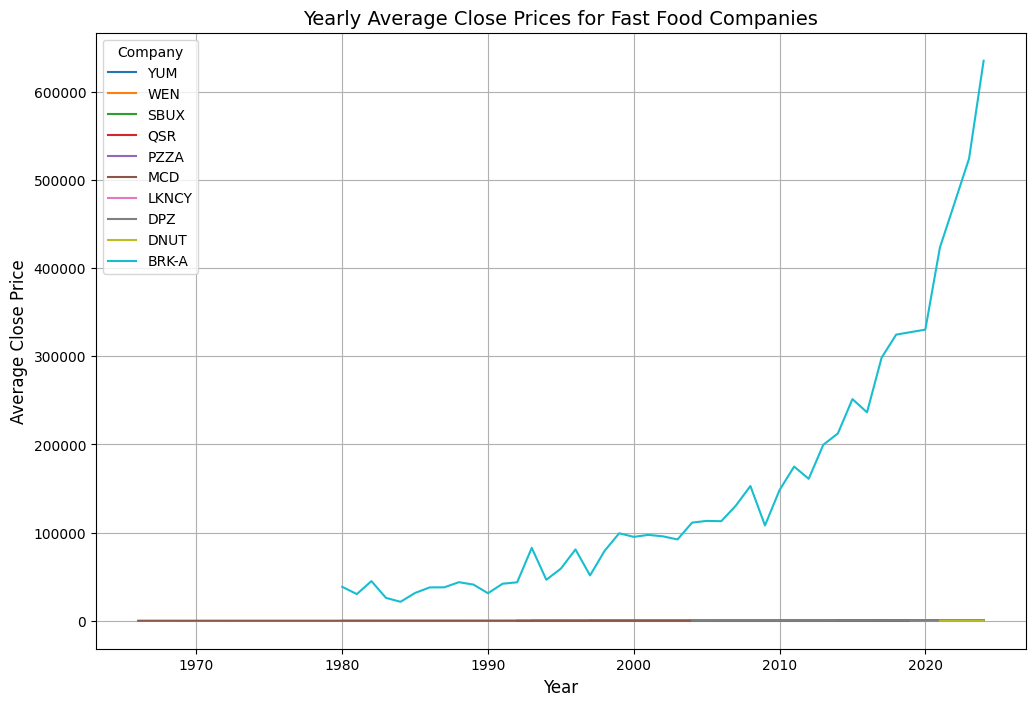

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets into a dictionary
file_paths = {
    "YUM": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/YUM.csv",
    "WEN": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/WEN.csv",
    "SBUX": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/SBUX.csv",
    "QSR": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/QSR.csv",
    "PZZA": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/PZZA.csv",
    "MCD": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/MCD.csv",
    "LKNCY": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/LKNCY.csv",
    "DPZ": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DPZ.csv",
    "DNUT": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DNUT.csv",
    "BRK-A": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/BRK-A.csv"
}

# Read and process datasets
yearly_averages = {}

for company, path in file_paths.items():
    data = pd.read_csv(path)
    # Ensure the date column is in datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    # Extract year from the Date column
    data['Year'] = data['Date'].dt.year
    # Calculate yearly average Close price
    yearly_avg = data.groupby('Year')['Close'].mean()
    yearly_averages[company] = yearly_avg

# Combine into a single DataFrame for plotting
yearly_avg_df = pd.DataFrame(yearly_averages)

# Plotting the yearly averages
plt.figure(figsize=(12, 8))
for company in yearly_avg_df.columns:
    plt.plot(yearly_avg_df.index, yearly_avg_df[company], label=company)

plt.title("Yearly Average Close Prices for Fast Food Companies", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Close Price", fontsize=12)
plt.legend(title="Company", fontsize=10)
plt.grid(True)
plt.show()


In [3]:
import pandas as pd

# Load datasets into a dictionary
file_paths = {
    "YUM": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/YUM.csv",
    "WEN": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/WEN.csv",
    "SBUX": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/SBUX.csv",
    "QSR": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/QSR.csv",
    "PZZA": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/PZZA.csv",
    "MCD": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/MCD.csv",
    "LKNCY": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/LKNCY.csv",
    "DPZ": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DPZ.csv",
    "DNUT": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DNUT.csv",
    "BRK-A": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/BRK-A.csv"
}

# Read and process datasets
yearly_averages = {}

for company, path in file_paths.items():
    data = pd.read_csv(path)
    # Ensure the date column is in datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    # Extract year from the Date column
    data['Year'] = data['Date'].dt.year
    # Calculate yearly average Close price
    yearly_avg = data.groupby('Year')['Close'].mean()
    yearly_averages[company] = yearly_avg

# Combine into a single DataFrame for tabular display
yearly_avg_df = pd.DataFrame(yearly_averages)
yearly_avg_table = yearly_avg_df.reset_index()
yearly_avg_table = yearly_avg_table.rename(columns={'Year': 'Year'})
yearly_avg_table.fillna("N/A", inplace=True)  # Handle missing data

# Display the table
print(yearly_avg_table)


    Year         YUM        WEN        SBUX        QSR        PZZA  \
0   1966         N/A        N/A         N/A        N/A         N/A   
1   1967         N/A        N/A         N/A        N/A         N/A   
2   1968         N/A        N/A         N/A        N/A         N/A   
3   1969         N/A        N/A         N/A        N/A         N/A   
4   1970         N/A        N/A         N/A        N/A         N/A   
5   1971         N/A        N/A         N/A        N/A         N/A   
6   1972         N/A        N/A         N/A        N/A         N/A   
7   1973         N/A        N/A         N/A        N/A         N/A   
8   1974         N/A        N/A         N/A        N/A         N/A   
9   1975         N/A        N/A         N/A        N/A         N/A   
10  1976         N/A        N/A         N/A        N/A         N/A   
11  1977         N/A        N/A         N/A        N/A         N/A   
12  1978         N/A        N/A         N/A        N/A         N/A   
13  1979         N/A

/var/folders/9s/jgblhq9d0h3bp9n0d4hpy34h0000gn/T/ipykernel_9042/3311310959.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  yearly_avg_table.fillna("N/A", inplace=True)  # Handle missing data


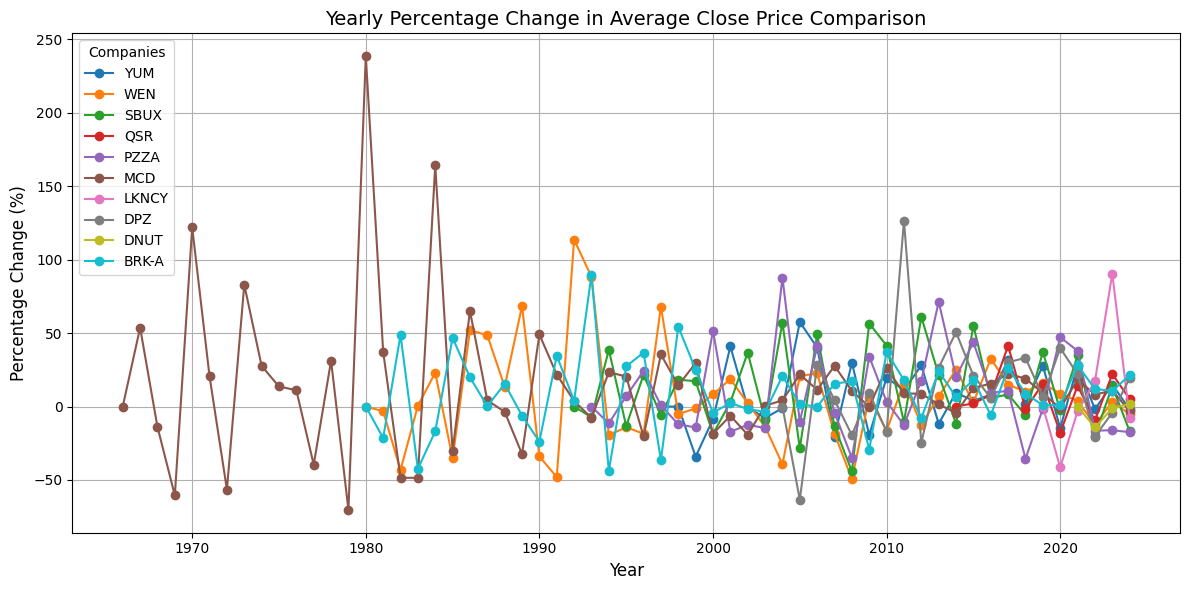

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data for each company
files = {
    "YUM": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/YUM.csv",
    "WEN": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/WEN.csv",
    "SBUX": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/SBUX.csv",
    "QSR": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/QSR.csv",
    "PZZA": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/PZZA.csv",
    "MCD": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/MCD.csv",
    "LKNCY": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/LKNCY.csv",
    "DPZ": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DPZ.csv",
    "DNUT": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/DNUT.csv",
    "BRK-A": "/Users/alexanderlange/Desktop/Python Final/Team7CC/data/Team_7/BRK-A.csv"
}

# Compute yearly percentage change in close prices
percentage_change_data = {}

for company, filepath in files.items():
    data = pd.read_csv(filepath, parse_dates=["Date"])
    data["Year"] = data["Date"].dt.year
    yearly_avg = data.groupby("Year")["Close"].mean()
    percentage_change = yearly_avg.pct_change().fillna(0) * 100
    percentage_change_data[company] = percentage_change

# Combine all data into a single DataFrame for plotting
percentage_change_df = pd.DataFrame(percentage_change_data)

# Plotting the percentage change comparison
plt.figure(figsize=(12, 6))
for company in percentage_change_df.columns:
    plt.plot(percentage_change_df.index, percentage_change_df[company], marker='o', label=company)

plt.title("Yearly Percentage Change in Average Close Price Comparison", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Change (%)", fontsize=12)
plt.legend(title="Companies")
plt.grid(True)
plt.tight_layout()
plt.show()


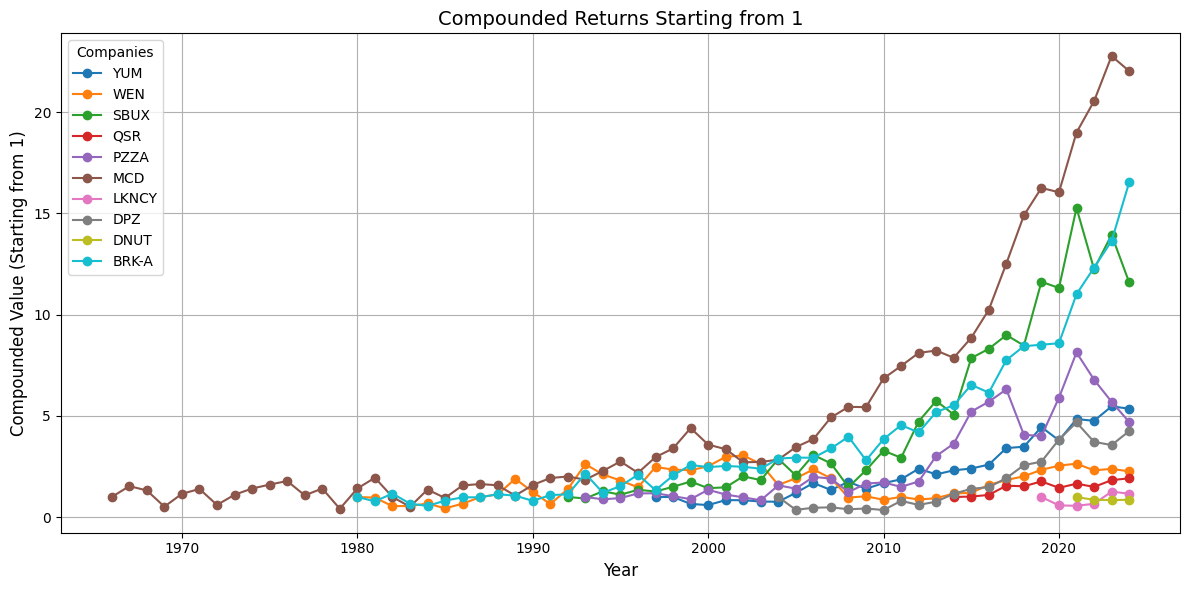

In [2]:
# Compute compounded returns starting from 1
compounded_returns = {}

for company, filepath in files.items():
    data = pd.read_csv(filepath, parse_dates=["Date"])
    data["Year"] = data["Date"].dt.year
    yearly_avg = data.groupby("Year")["Close"].mean()
    compounded_return = (1 + yearly_avg.pct_change().fillna(0)).cumprod()
    compounded_returns[company] = compounded_return

# Combine all compounded return data into a single DataFrame for plotting
compounded_returns_df = pd.DataFrame(compounded_returns)

# Plotting the compounded returns comparison
plt.figure(figsize=(12, 6))
for company in compounded_returns_df.columns:
    plt.plot(compounded_returns_df.index, compounded_returns_df[company], marker='o', label=company)

plt.title("Compounded Returns Starting from 1", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Compounded Value (Starting from 1)", fontsize=12)
plt.legend(title="Companies")
plt.grid(True)
plt.tight_layout()
plt.show()


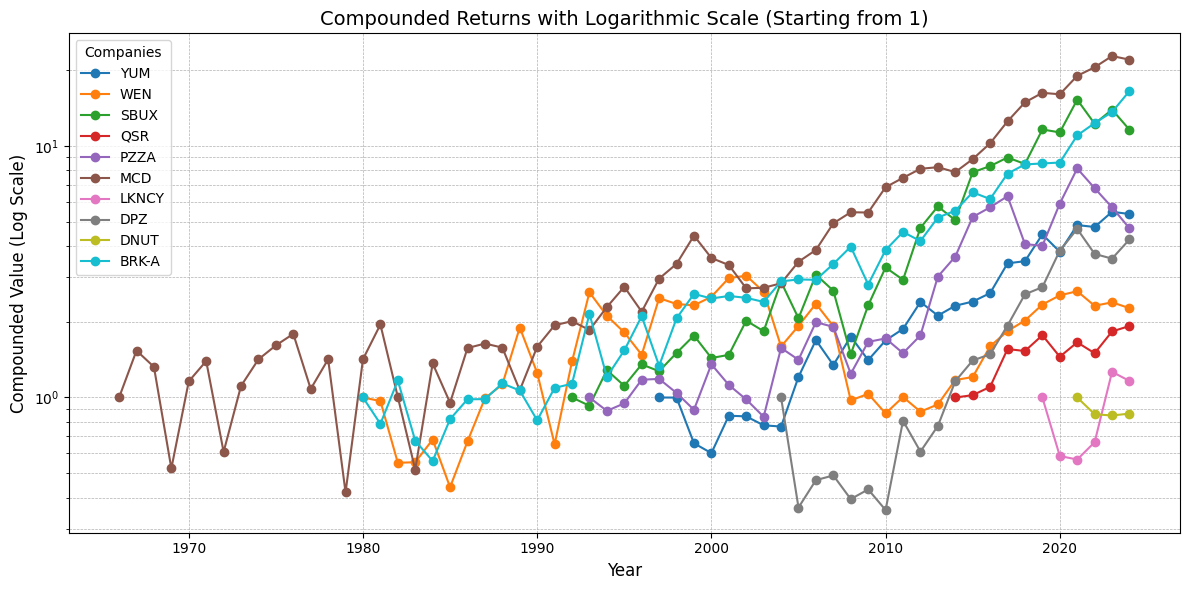

In [3]:
# Plotting the compounded returns comparison with a logarithmic scale on the y-axis
plt.figure(figsize=(12, 6))
for company in compounded_returns_df.columns:
    plt.plot(compounded_returns_df.index, compounded_returns_df[company], marker='o', label=company)

plt.title("Compounded Returns with Logarithmic Scale (Starting from 1)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Compounded Value (Log Scale)", fontsize=12)
plt.yscale("log")
plt.legend(title="Companies")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


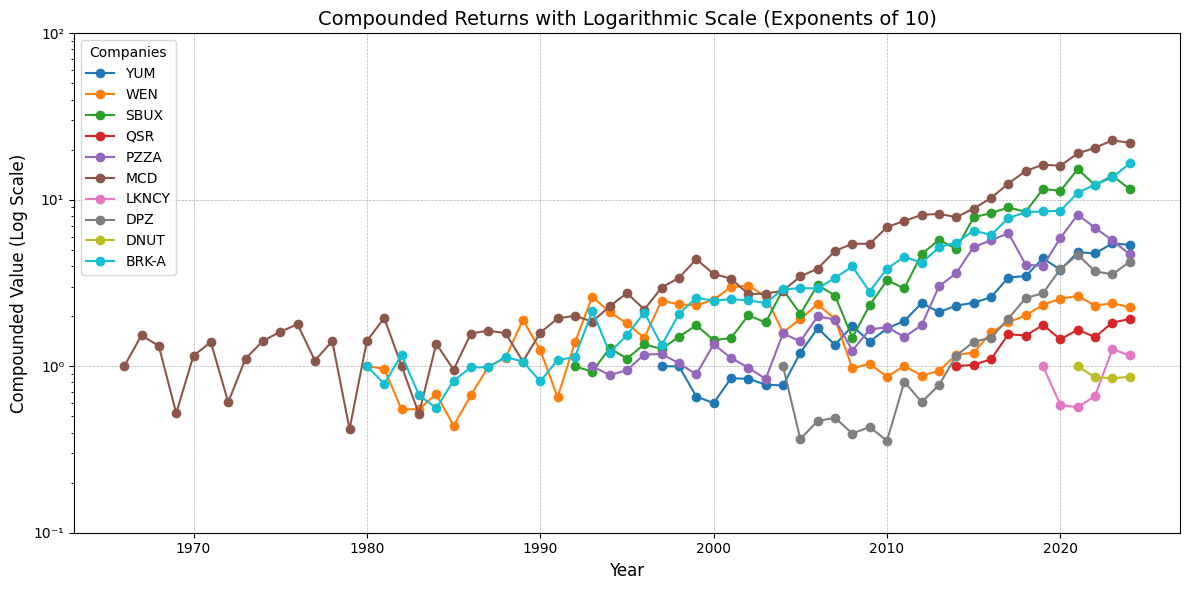

In [5]:
# Adjusting data for log scale (handling negative and zero values)
adjusted_compounded_returns_df = compounded_returns_df.copy()
adjusted_compounded_returns_df[adjusted_compounded_returns_df <= 0] = None  # Replace non-positive values with NaN

# Plotting the adjusted data with exponents of 10 on the y-axis
plt.figure(figsize=(12, 6))
for company in adjusted_compounded_returns_df.columns:
    plt.plot(adjusted_compounded_returns_df.index, adjusted_compounded_returns_df[company], marker='o', label=company)

plt.title("Compounded Returns with Logarithmic Scale (Exponents of 10)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Compounded Value (Log Scale)", fontsize=12)
plt.yscale("log")
plt.ylim(0.1, 100)  # Set y-axis limits to range from near-zero to 100
plt.yticks([0.1, 1, 10, 100], labels=["10⁻¹", "10⁰", "10¹", "10²"])
plt.grid(True, which="major", linestyle='--', linewidth=0.5)  # Keep only major gridlines
plt.legend(title="Companies")
plt.tight_layout()
plt.show()
